In [ ]:
In questo esercizio è stato stimato l'integrale di r tra 0 e 1, ed è stata valutata la sua varianza con metodo del data blocking. 
E' stato anche effettuato un test del chi quadro, che misura l'errore tra dati osservati e attesi.
Qui sotto i grafici; i primi due rappresentanti la differenza tra il valore calcolato e il valore atteso in funzione del numero di blocchi.

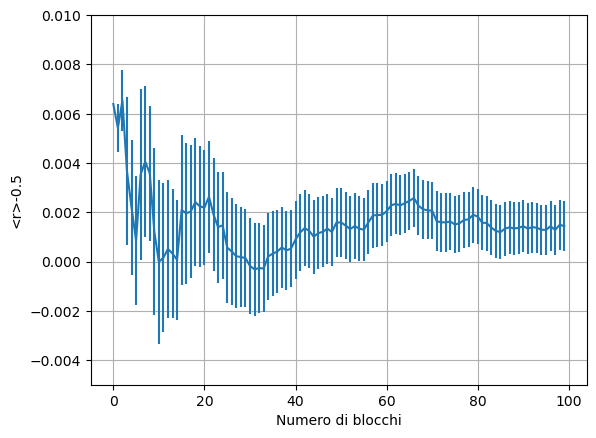

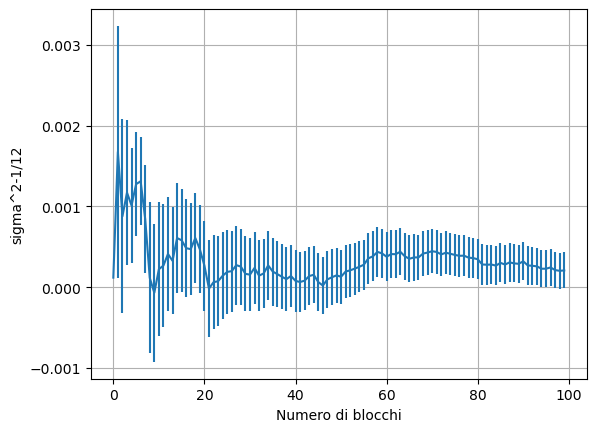

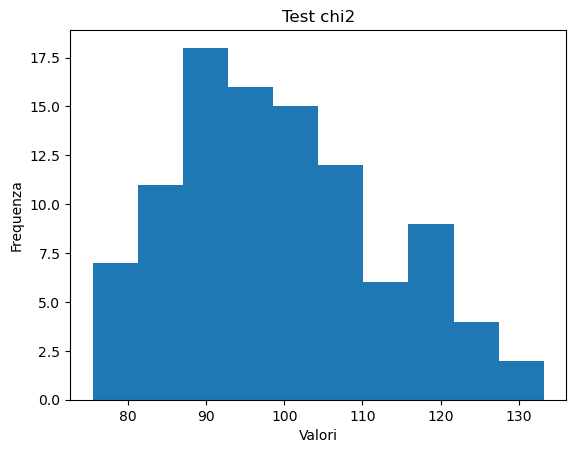

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    # Inizializza due liste vuote per memorizzare i dati
    medie = []
    var = []
    sigma2 = []
    err = []
    chi2 = []

    # Apre il file e legge i dati riga per riga
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
    # Ignora la prima riga (riga di intestazione)
        next(file)
        for line in file:
            # Divide ogni riga in due numeri e li aggiunge alle rispettive liste
            values = line.split()
            medie.append(float(values[0]))
            var.append(float(values[1]))
            sigma2.append(float(values[2]))
            err.append(float(values[3]))
            chi2.append(float(values[4]))
            
    return medie, var, sigma2, err, chi2

# Chiamata alla funzione per leggere i dati dal file
medie, var, sigma2, err, chi2 = read_data_from_file("ris.dat")
sigma2 = np.array(sigma2) 

x = np.arange(100, dtype=float)  # Specifica il dtype come float
plt.errorbar(x, np.array(medie)-0.5, yerr=np.array(var))
plt.xlabel('Numero di blocchi')
plt.ylabel('<r>-0.5')
plt.ylim(-0.005, 0.01)
plt.grid(True)
plt.show()

plt.errorbar(x,sigma2-1/12,yerr=err)
plt.xlabel('Numero di blocchi')
plt.ylabel('sigma^2-1/12')
plt.grid(True)
plt.show()

plt.hist(chi2)
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Test chi2')
plt.show()
